In [4]:
import numpy as np
import csv
from helpers import*
import seaborn as sns
import matplotlib.pyplot as plt

# ML Project 1 Jupyter Notebook _ sophiev1

##Question for the TAs
why is a 'b in front of the titles
when should loadtxt or genfromtxt be used
outlier detection needed?

In [15]:
dtypes = "i8,S5,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,i8,f8,f8,f8,f8,f8,f8,f8"
data = np.loadtxt('train.csv',delimiter=",",skiprows=1, unpack=True, dtype=dtypes)

headers=np.loadtxt('train.csv',delimiter=",",max_rows=1, unpack=True,dtype='S')

In [34]:
print(headers)

[b'Id' b'Prediction' b'DER_mass_MMC' b'DER_mass_transverse_met_lep'
 b'DER_mass_vis' b'DER_pt_h' b'DER_deltaeta_jet_jet' b'DER_mass_jet_jet'
 b'DER_prodeta_jet_jet' b'DER_deltar_tau_lep' b'DER_pt_tot' b'DER_sum_pt'
 b'DER_pt_ratio_lep_tau' b'DER_met_phi_centrality'
 b'DER_lep_eta_centrality' b'PRI_tau_pt' b'PRI_tau_eta' b'PRI_tau_phi'
 b'PRI_lep_pt' b'PRI_lep_eta' b'PRI_lep_phi' b'PRI_met' b'PRI_met_phi'
 b'PRI_met_sumet' b'PRI_jet_num' b'PRI_jet_leading_pt'
 b'PRI_jet_leading_eta' b'PRI_jet_leading_phi' b'PRI_jet_subleading_pt'
 b'PRI_jet_subleading_eta' b'PRI_jet_subleading_phi' b'PRI_jet_all_pt']


In [16]:
with open('train.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headers2 = next(reader)
data2 = np.genfromtxt('train.csv', delimiter=",",names=True, dtype=dtypes)

In [24]:
data2

array([(100000, b's',  138.47 ,  51.655,  97.827, 27.98 ,  9.10e-01,  124.711,    2.666, 3.064, 41.928, 197.76 , 1.582,  1.396,  2.00e-01, 32.638,  1.017,  0.381,  51.626,  2.273, -2.414, 16.824, -0.277, 258.733, 2,   67.435,  2.150e+00,  4.440e-01,   46.062,    1.24,   -2.475, 113.497),
       (100001, b'b',  160.937,  68.768, 103.235, 48.146, -9.99e+02, -999.   , -999.   , 3.473,  2.078, 125.157, 0.879,  1.414, -9.99e+02, 42.014,  2.039, -3.011,  36.918,  0.501,  0.103, 44.704, -1.916, 164.546, 1,   46.226,  7.250e-01,  1.158e+00, -999.   , -999.  , -999.   ,  46.226),
       (100002, b'b', -999.   , 162.172, 125.953, 35.635, -9.99e+02, -999.   , -999.   , 3.148,  9.336, 197.814, 3.776,  1.414, -9.99e+02, 32.154, -0.705, -2.093, 121.409, -0.953,  1.052, 54.283, -2.186, 260.414, 1,   44.251,  2.053e+00, -2.028e+00, -999.   , -999.  , -999.   ,  44.251),
       ...,
       (349997, b's',  105.457,  60.526,  75.839, 39.757, -9.99e+02, -999.   , -999.   , 2.39 , 22.183, 120.462, 1.202,  

### Initial Data Inspection
Displaying data statistics

In [60]:
for col in headers2[2:]:
    print(col+ ':     ', 'mean:     ',np.mean(data2[col]), 'median:     ',np.median(data2[col]), 'Standard deviation:     ',np.std(data2[col]))

DER_mass_MMC:      mean:      -49.023079440000004 median:      105.012 Standard deviation:      406.34483401069514
DER_mass_transverse_met_lep:      mean:      49.239819276 median:      46.524 Standard deviation:      35.34481492202995
DER_mass_vis:      mean:      81.181981612 median:      73.752 Standard deviation:      40.8286088749526
DER_pt_h:      mean:      57.895961656 median:      38.4675 Standard deviation:      63.65555430684573
DER_deltaeta_jet_jet:      mean:      -708.4206753999999 median:      -999.0 Standard deviation:      454.4796561486444
DER_mass_jet_jet:      mean:      -601.2370507319998 median:      -999.0 Standard deviation:      657.9709861672479
DER_prodeta_jet_jet:      mean:      -709.3566029000002 median:      -999.0 Standard deviation:      453.01897051142817
DER_deltar_tau_lep:      mean:      2.3730998440000004 median:      2.4915000000000003 Standard deviation:      0.7829095528215093
DER_pt_tot:      mean:      18.91733244400001 median:      12.3155 St

### Histogram Visualization
Before treating data we can use histograms to visualize the distributions.

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


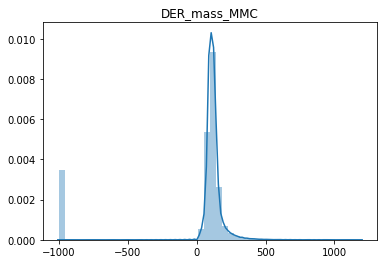

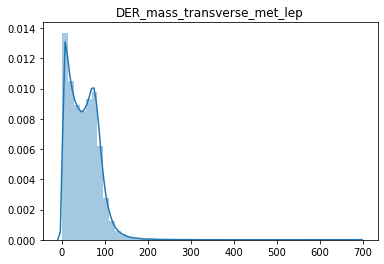

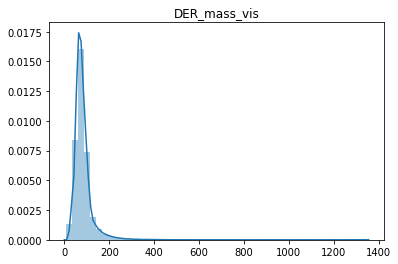

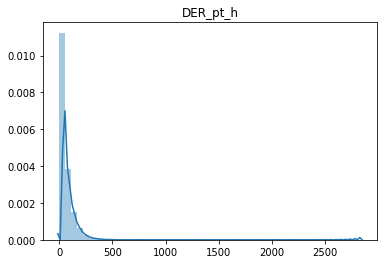

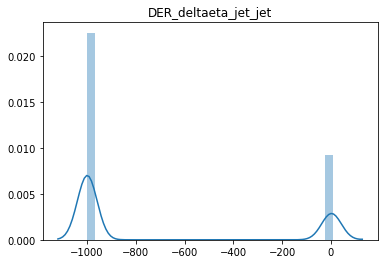

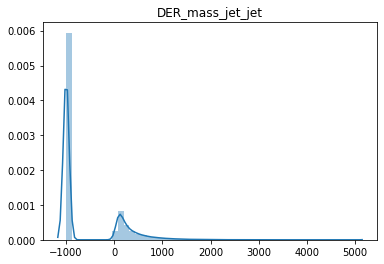

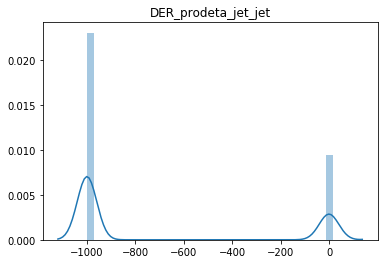

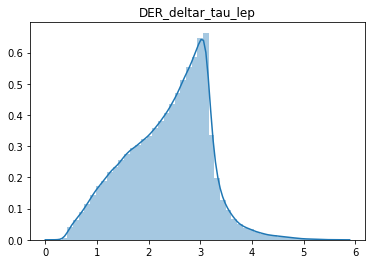

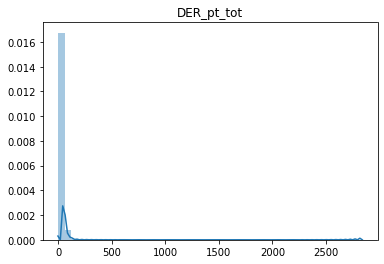

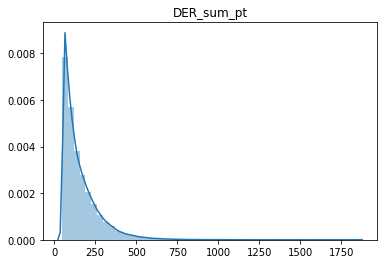

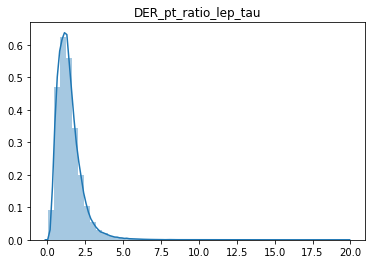

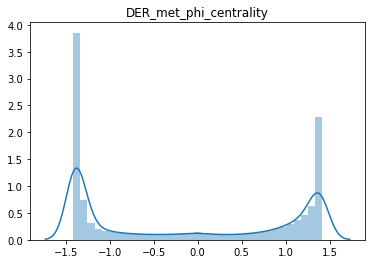

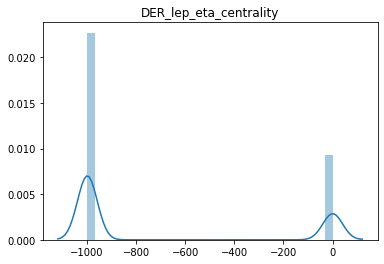

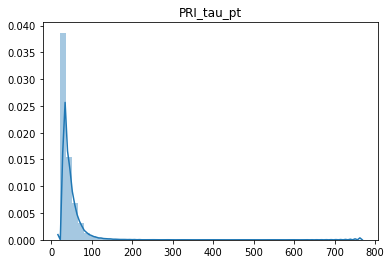

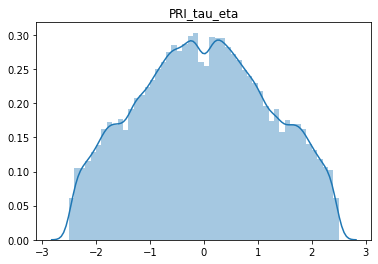

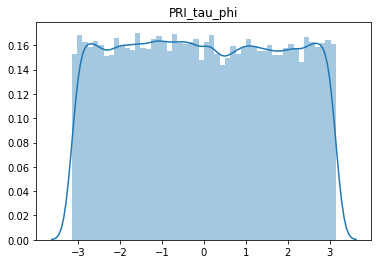

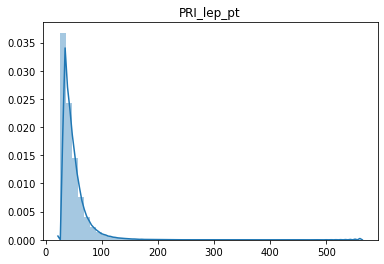

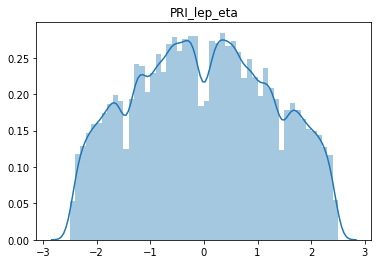

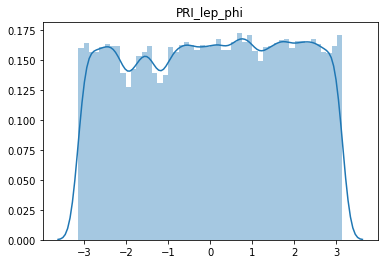

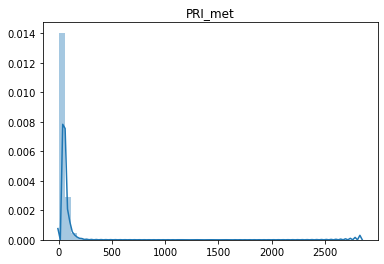

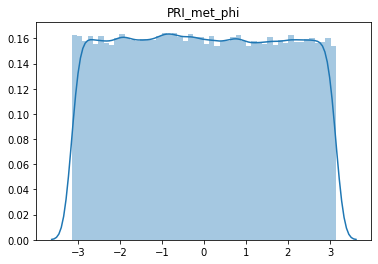

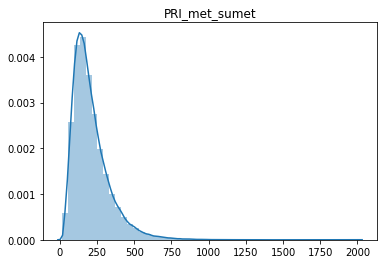

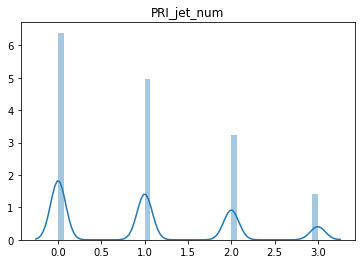

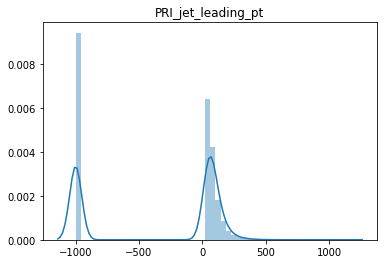

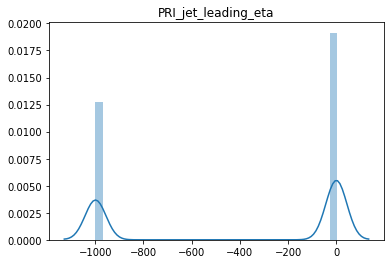

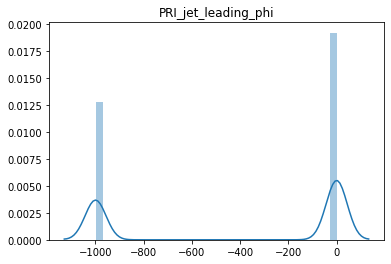

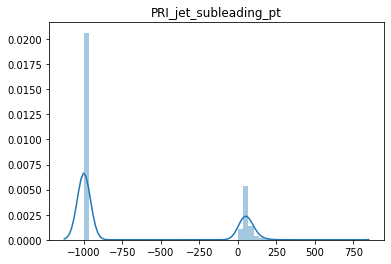

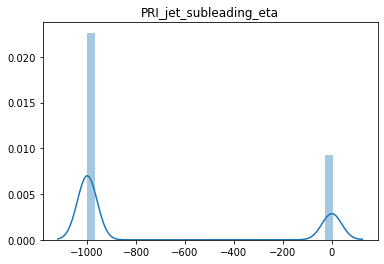

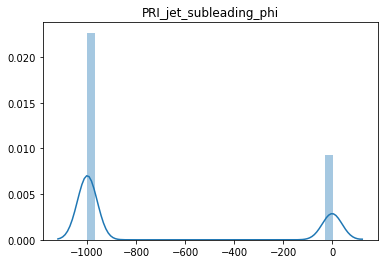

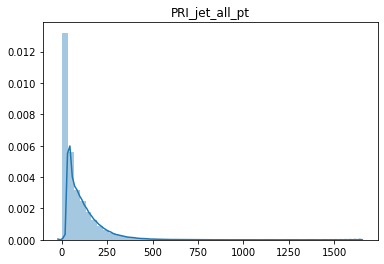

In [65]:
#histogram distribution for different features
for col in headers2[2:]:
    plt.figure()
    plt.title(col)
    xhist=data2[col]
    sns.distplot(xhist)


#### Histograms grouped by target variable
Ideally it would be interesting to see how distributions differ based on the label value. So we can split each feature histogram by color.

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


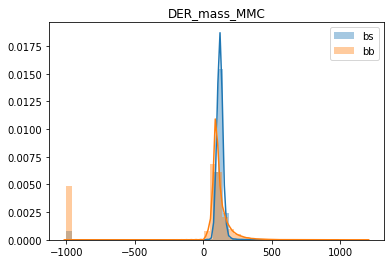

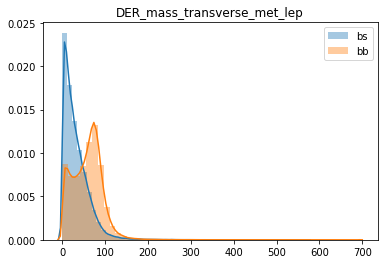

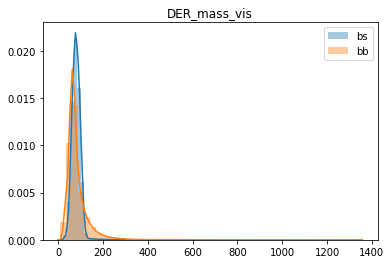

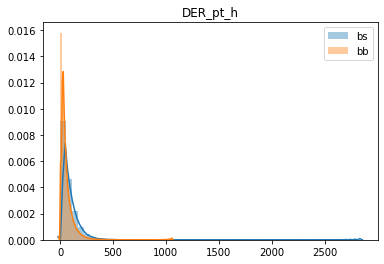

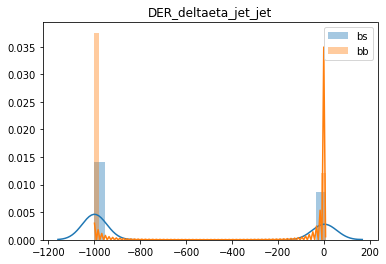

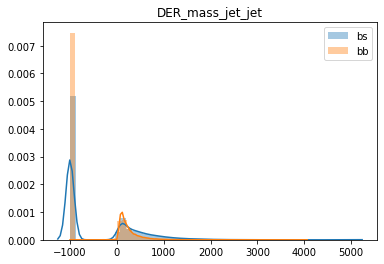

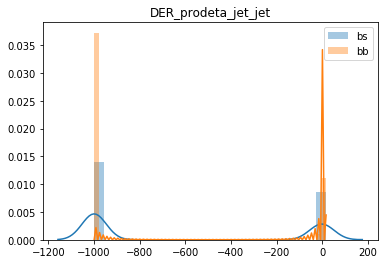

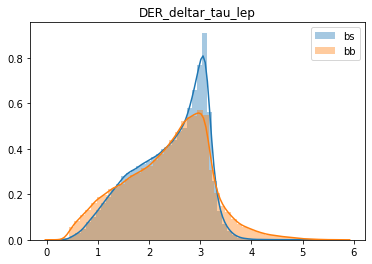

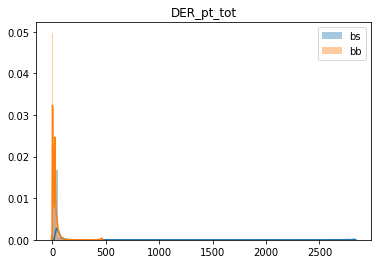

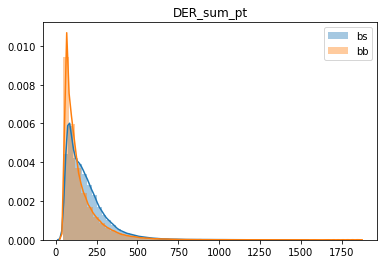

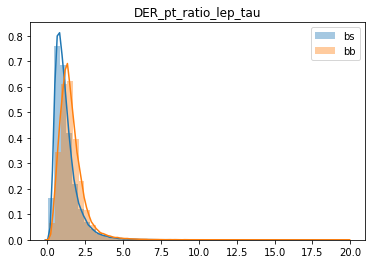

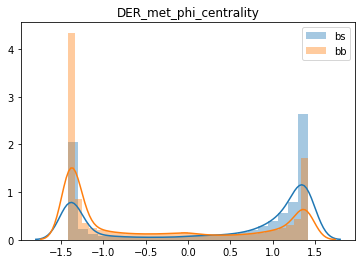

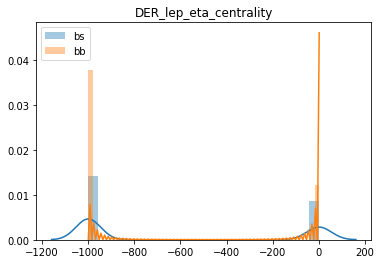

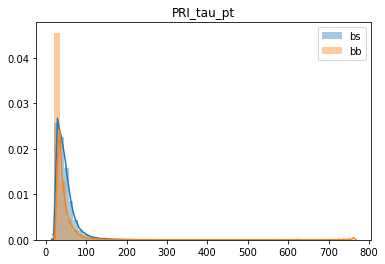

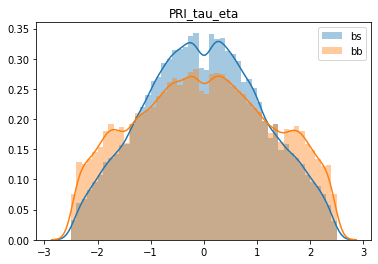

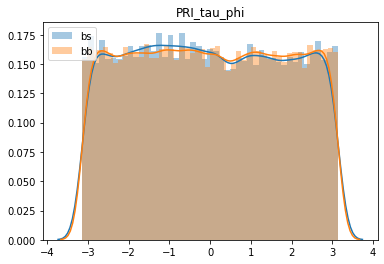

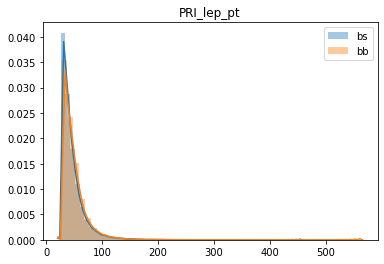

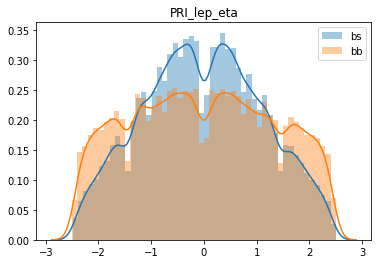

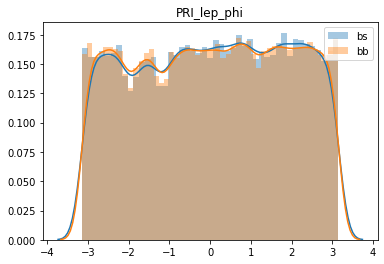

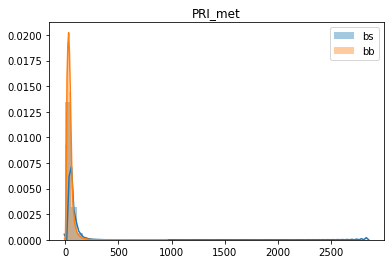

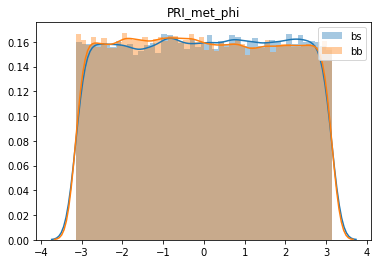

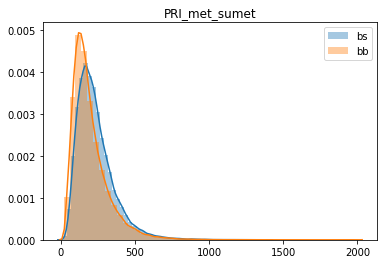

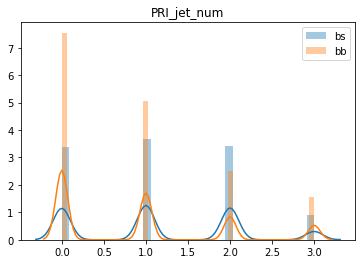

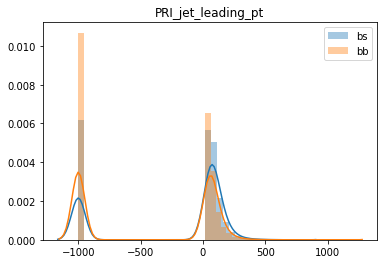

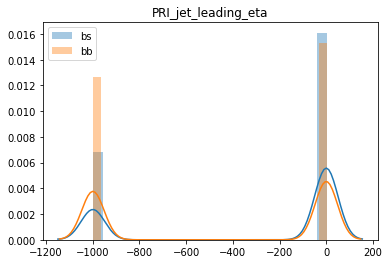

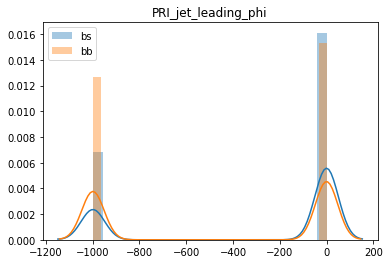

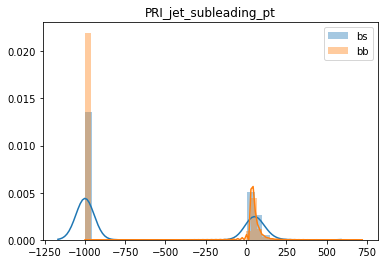

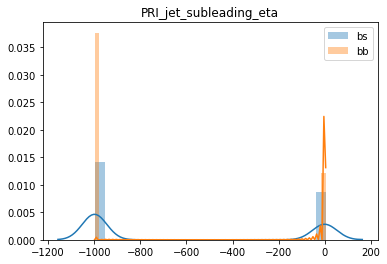

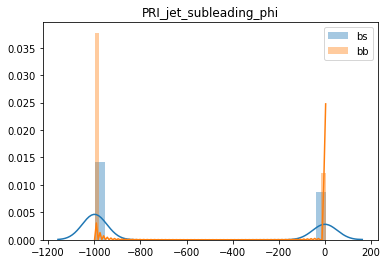

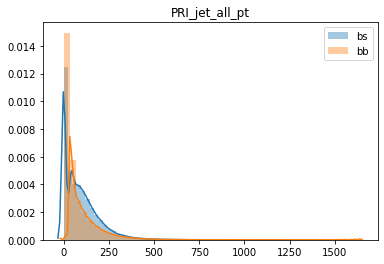

In [85]:
for col in headers2[2:]:
    plt.figure()
    plt.title(col)
    xhistotal=data2[col]
    xbs=[]
    xbb=[]
    for i in range(data2['Id'].size):
        if data2['Prediction'][i]==b's':
            xbs.append(data2[col][i])
        else:
            xbb.append(data2[col][i])
    xbs=np.array(xbs)
    xbb=np.array(xbb)
    sns.distplot(xbs, label='bs')
    sns.distplot(xbb,label='bb')
    plt.legend()

In [67]:
np.unique(data2['Prediction'])

array([b'b', b's'], dtype='|S5')

### Visualizing Correlation between the 30 feature variables
question: should we include y in correlation matrix

In [43]:
#initializing correlation list
listcorr=[]
for col in headers2[2:]:
    listcorr.append(data2[col])

#double check dimensions
np.corrcoef(listcorr).shape

(30, 30)

Text(0.5, 1, 'Correlation between all features')

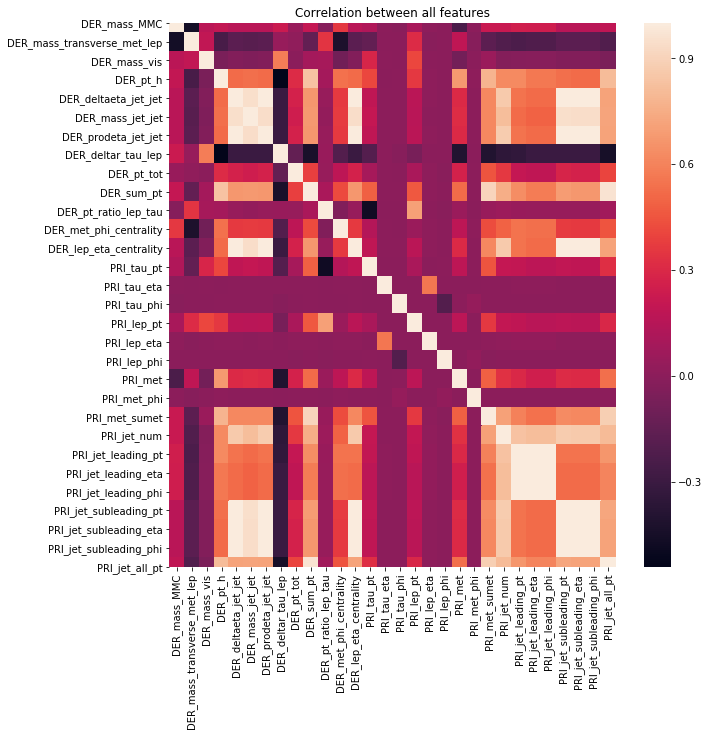

In [84]:
#use seaborn to create correlation matrix
fig, ax = plt.subplots(figsize=(10,10))    
corrmatrice=np.corrcoef(listcorr)
x_axis_labels=headers2[2:]
y_axis_labels=headers2[2:]
sns.heatmap(corrmatrice,xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax)
plt.title('Correlation between all features')

### Visualizing correlation between target variable and features

in order to do this we need to first replace the variable b and s with binary 0 and 1


In [62]:
arbinary=(data2['Prediction']==b's')

In [63]:
listcorr2=[]
for col in headers2[2:]:
    listcorr2.append(data2[col])
listcorr2.append(arbinary)
## check dimensions
np.corrcoef(listcorr2).shape

(31, 31)

In [77]:
xlabels=headers2[2:]
xlabels.append('Prediction')
print(xlabels)

['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Prediction']


In [75]:
xlabels.append(2)
print(xlabels)

['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 2, 2]


Text(0.5, 1, 'Correlation with target variable Vs all features')

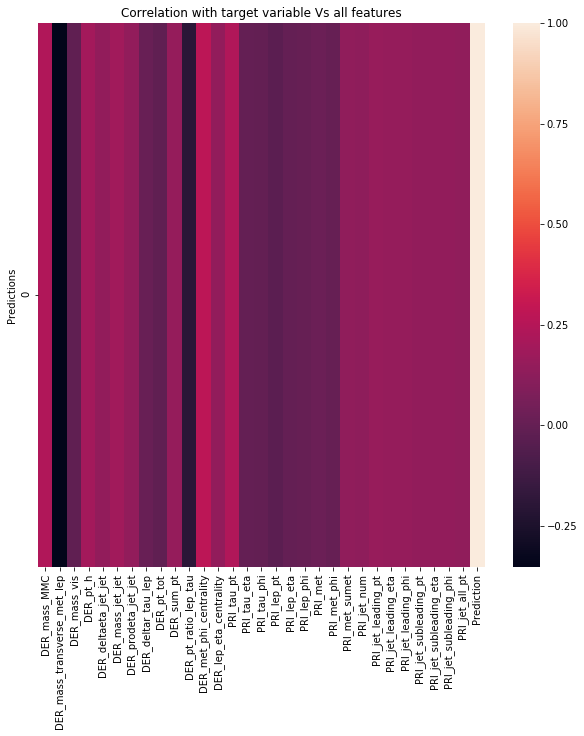

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
corrmatrice2=np.corrcoef(listcorr2)
xlabels=headers2[2:]
xlabels.append('Prediction')

sns.heatmap(np.array([corrmatrice2[30]]),xticklabels=xlabels, ax=ax)
plt.ylabel('Predictions')
plt.title('Correlation with target variable Vs all features')

## Simplest linear probability classifier model

1) split into train and testing set 
2) Use analytical formua to solve Least Mean Squared
3) predict and estimate generalizablity through test error

In [114]:
from least_squares import*
from split_data import*
from costs import*
from build_polynomial import*

In [107]:
y=arbinary
x=data2[headers2[2:]]
ratio=0.8

In [98]:
indices=[1,4,6]
datatrain=[data2[i] for i in indices]

In [106]:
data2[['DER_mass_MMC','DER_mass_transverse_met_lep']] # why do you need [[]] for it to index 

array([( 138.47 ,  51.655), ( 160.937,  68.768), (-999.   , 162.172), ...,
       ( 105.457,  60.526), (  94.951,  19.362), (-999.   ,  72.756)],
      dtype={'names':['DER_mass_MMC','DER_mass_transverse_met_lep'], 'formats':['<f8','<f8'], 'offsets':[13,21], 'itemsize':253})

In [102]:
data2[i] #question for assistant what is the meaning of the data being in () brackets

(100001, b'b', 160.937, 68.768, 103.235, 48.146, -999., -999., -999., 3.473, 2.078, 125.157, 0.879, 1.414, -999., 42.014, 2.039, -3.011, 36.918, 0.501, 0.103, 44.704, -1.916, 164.546, 1, 46.226, 0.725, 1.158, -999., -999., -999., 46.226)

In [119]:
Xtest, Xtrain, Ytest, Ytrain= split_data(x, y, ratio, seed=1)

In [121]:
np.ones([len(Xtrain),1])

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [123]:
Xtrainones= np.append(np.ones([len(Xtrain),1]),np.array(Xtrain), axis=1)

ValueError: all the input arrays must have same number of dimensions

In [129]:
new_list = list(map(lambda x: [1] + list(x), Xtrain))
print(np.array(new_list).shape)

(200000, 31)


In [130]:
xtrain=np.array(new_list)
new_listest = list(map(lambda x: [1] + list(x), Xtest))
xtest=np.array(new_listest)

In [115]:
#adding a column of 1 to make the extended X Matrix
txtrain=xtrain.T
txtest=xtest.T
#transform Ys into arrays
Ytrain=np.array(Ytrain)
Ytest=np.array(Ytest)
#solving for weights using LS
MSE, weights=least_squares(y, tx)

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

Now we can make probability predictions and display confusion matrix. We will use the condition that if the value is above 0.5 it is 1 and below 0.5 it is 0. We can sum up all the matching prediction and divide by test size to obtain accuracy measure. 

In [ ]:
#Train Data
#training accuracy

#Test Data
yprob=np.dot(txtest,weights)
yclass=(yprob> 0.5)
#measuring accuracy of prediction
ysame=np.sum(yclass==Ytest)
accuracy=ysame/Ytest.size